# Parcial 2022-2
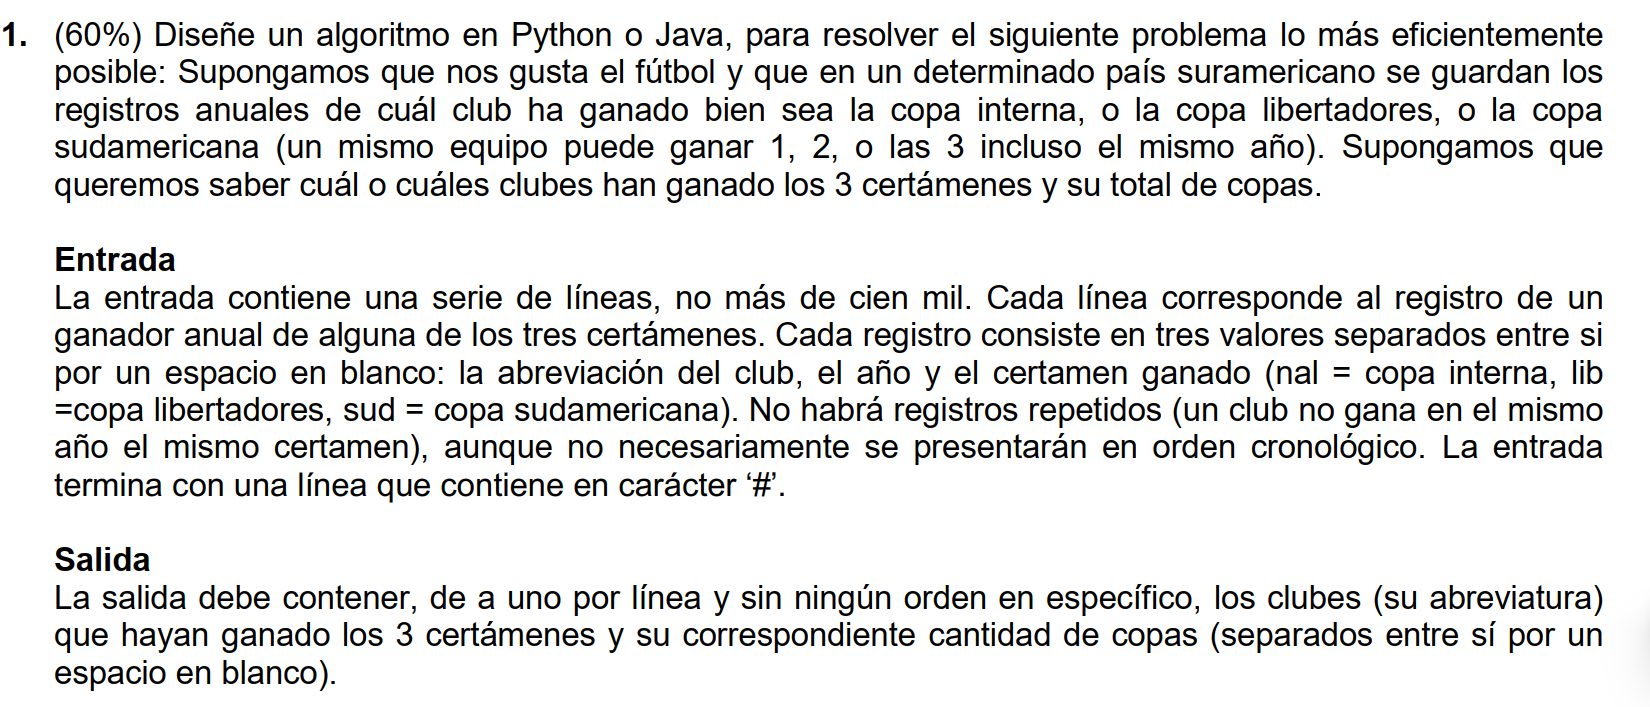
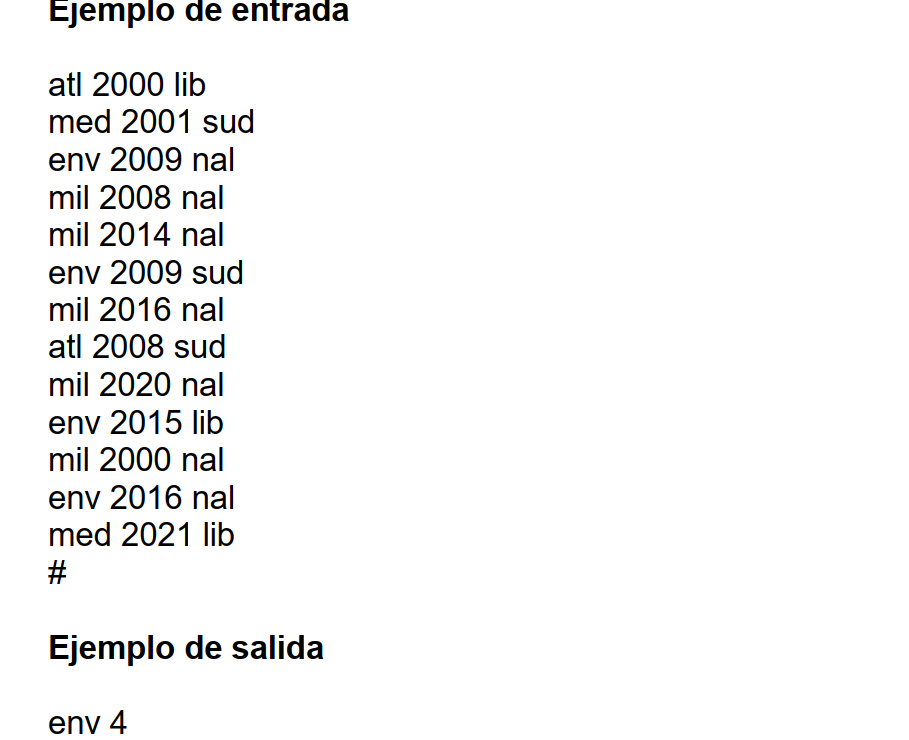

In [23]:
dicEquipos = {}

while True:    
    linea = input().split(" ")
    if linea[0] == "#" :
        break
    club, año, certamen = linea[0], linea[1], linea[2]
    if club not in dicEquipos:
        dicEquipos[club] = {"año": [],
                            "certamen":[]
                            }

    dicEquipos[club]["año"].append(año)
    dicEquipos[club]["certamen"].append(certamen)

print(dicEquipos)

# Verificación con conjuntos
for key in dicEquipos:
    if {"lib", "sud", "nal"}.issubset(set(dicEquipos[key]["certamen"])):
        print(key, "ganador", len(dicEquipos[key]["certamen"]) )

{'med': {'año': ['2001', '2002', '2003'], 'certamen': ['lib', 'sud', 'nal']}, 'bog': {'año': ['2010', '2011'], 'certamen': ['lib', 'sud']}}
med ganador 3


In [24]:
dic = {'nel': {'año': ['2'], 'certamen': ['sub']}, 'med': {'año': ['3'], 'certamen': ['loc']}}
for key in dic:
    print(key, dic[key]["certamen"])

for equipo, datos in dic.items():
    print(equipo, datos["certamen"])



nel ['sub']
med ['loc']
nel ['sub']
med ['loc']


In [ ]:
def process_tournament_records():
    # Dictionary to store sets of tournaments won by each club
    club_tournaments = {}
    # Dictionary to count total wins for each club
    club_wins = {}
    
    while True:
        line = input().strip()
        if line == '#':
            break
            
        # Parse input line
        club, year, tournament = line.split()
        
        # Update tournaments won by club
        if club not in club_tournaments:
            club_tournaments[club] = set()
        club_tournaments[club].add(tournament)
        
        # Update total wins count
        club_wins[club] = club_wins.get(club, 0) + 1
    
    # Check which clubs won all three tournaments
    all_tournaments = {'nal', 'lib', 'sud'}
    
    # Print clubs that won all tournaments and their total wins
    for club in club_tournaments:
        if club_tournaments[club] == all_tournaments:
            print(f"{club} {club_wins[club]}")

# Run 

process_tournament_records()

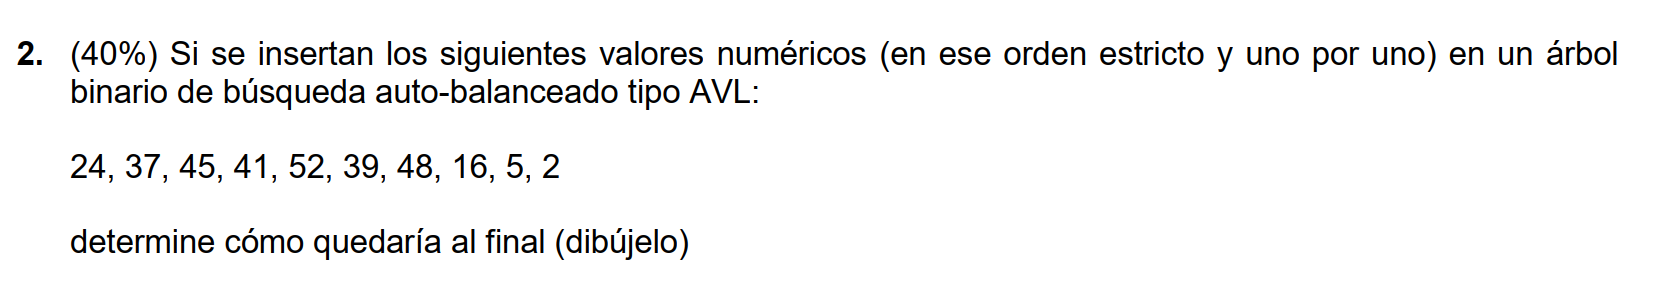

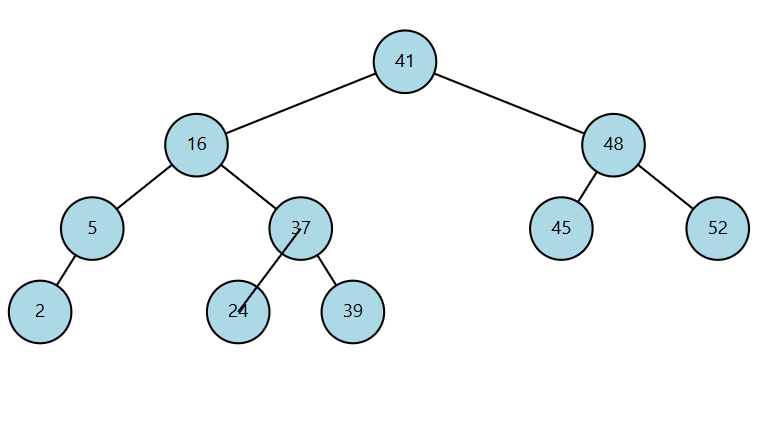

In [1]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def get_height(self, node):
        return node.height if node else 0
    
    def get_balance(self, node):
        return self.get_height(node.left) - self.get_height(node.right) if node else 0
    
    def rotate_right(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        
        root.height = max(self.get_height(root.left), self.get_height(root.right)) + 1
        balance = self.get_balance(root)
        
        if balance > 1 and key < root.left.key:
            return self.rotate_right(root)
        if balance < -1 and key > root.right.key:
            return self.rotate_left(root)
        if balance > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        
        return root
    
    def print_tree(self, root, level=0, prefix="Root: "):
        if root is not None:
            print(" " * (level * 4) + prefix + str(root.key))
            if root.left or root.right:
                self.print_tree(root.left, level + 1, "L--- ")
                self.print_tree(root.right, level + 1, "R--- ")

# Insertar los valores en orden dado
avl = AVLTree()
root = None
values = [24, 37, 45, 41, 52, 39, 48, 16, 5, 2]
for v in values:
    root = avl.insert(root, v)

# Mostrar el árbol AVL resultante
avl.print_tree(root)


Root: 41
    L--- 16
        L--- 5
            L--- 2
        R--- 37
            L--- 24
            R--- 39
    R--- 48
        L--- 45
        R--- 52


In [2]:
class NodoAVL:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None
        self.altura = 1

class ArbolAVL:
    def __init__(self):
        self.raiz = None
    
    def altura(self, nodo):
        if not nodo:
            return 0
        return nodo.altura
    
    def factor_balance(self, nodo):
        if not nodo:
            return 0
        return self.altura(nodo.izquierdo) - self.altura(nodo.derecho)
    
    def actualizar_altura(self, nodo):
        if not nodo:
            return 0
        nodo.altura = 1 + max(self.altura(nodo.izquierdo), self.altura(nodo.derecho))
    
    def rotacion_derecha(self, y):
        x = y.izquierdo
        T2 = x.derecho
        
        # Realizar rotación
        x.derecho = y
        y.izquierdo = T2
        
        # Actualizar alturas
        self.actualizar_altura(y)
        self.actualizar_altura(x)
        
        return x
    
    def rotacion_izquierda(self, x):
        y = x.derecho
        T2 = y.izquierdo
        
        # Realizar rotación
        y.izquierdo = x
        x.derecho = T2
        
        # Actualizar alturas
        self.actualizar_altura(x)
        self.actualizar_altura(y)
        
        return y
    
    def insertar(self, raiz, valor):
        # Inserción normal en un BST
        if not raiz:
            return NodoAVL(valor)
        
        if valor < raiz.valor:
            raiz.izquierdo = self.insertar(raiz.izquierdo, valor)
        elif valor > raiz.valor:
            raiz.derecho = self.insertar(raiz.derecho, valor)
        else:
            # Los valores duplicados no se insertan
            return raiz
        
        # Actualizar altura del nodo actual
        self.actualizar_altura(raiz)
        
        # Obtener factor de balance
        balance = self.factor_balance(raiz)
        
        # Caso 1: Desbalance izquierda-izquierda
        if balance > 1 and valor < raiz.izquierdo.valor:
            return self.rotacion_derecha(raiz)
        
        # Caso 2: Desbalance derecha-derecha
        if balance < -1 and valor > raiz.derecho.valor:
            return self.rotacion_izquierda(raiz)
        
        # Caso 3: Desbalance izquierda-derecha
        if balance > 1 and valor > raiz.izquierdo.valor:
            raiz.izquierdo = self.rotacion_izquierda(raiz.izquierdo)
            return self.rotacion_derecha(raiz)
        
        # Caso 4: Desbalance derecha-izquierda
        if balance < -1 and valor < raiz.derecho.valor:
            raiz.derecho = self.rotacion_derecha(raiz.derecho)
            return self.rotacion_izquierda(raiz)
        
        return raiz
    
    def insertar_valor(self, valor):
        self.raiz = self.insertar(self.raiz, valor)
    
    def preorden(self, nodo):
        if not nodo:
            return
        print(nodo.valor, end=" ")
        self.preorden(nodo.izquierdo)
        self.preorden(nodo.derecho)
    
    def imprimir_arbol(self):
        print("Recorrido preorden:")
        self.preorden(self.raiz)
        print()

# Prueba con los valores del problema
def resolver_problema():
    # Crear un árbol AVL y realizar las inserciones
    avl = ArbolAVL()
    valores = [24, 37, 45, 41, 52, 39, 48, 16, 5, 2]
    
    print("Inserción paso a paso:")
    for valor in valores:
        avl.insertar_valor(valor)
        print(f"Después de insertar {valor}:", end=" ")
        avl.imprimir_arbol()
    
    return avl

# Ejecutar la solución
if __name__ == "__main__":
    resolver_problema()

Inserción paso a paso:
Después de insertar 24: Recorrido preorden:
24 
Después de insertar 37: Recorrido preorden:
24 37 
Después de insertar 45: Recorrido preorden:
37 24 45 
Después de insertar 41: Recorrido preorden:
37 24 45 41 
Después de insertar 52: Recorrido preorden:
37 24 45 41 52 
Después de insertar 39: Recorrido preorden:
41 37 24 39 45 52 
Después de insertar 48: Recorrido preorden:
41 37 24 39 48 45 52 
Después de insertar 16: Recorrido preorden:
41 37 24 16 39 48 45 52 
Después de insertar 5: Recorrido preorden:
41 37 16 5 24 39 48 45 52 
Después de insertar 2: Recorrido preorden:
41 16 5 2 37 24 39 48 45 52 


# Parcial 2023 1

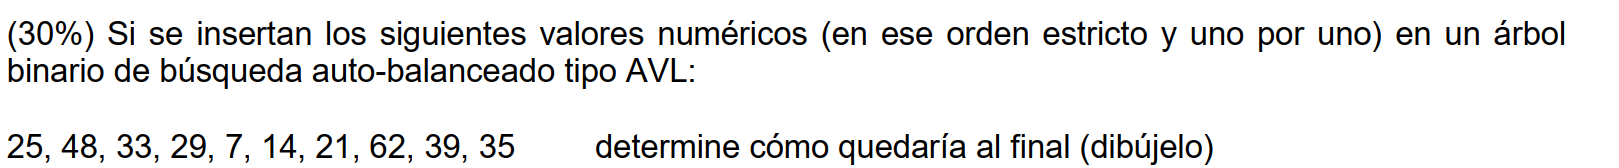

In [4]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def get_height(self, node):
        return node.height if node else 0
    
    def get_balance(self, node):
        return self.get_height(node.left) - self.get_height(node.right) if node else 0
    
    def rotate_right(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        
        root.height = max(self.get_height(root.left), self.get_height(root.right)) + 1
        balance = self.get_balance(root)
        
        if balance > 1 and key < root.left.key:
            return self.rotate_right(root)
        if balance < -1 and key > root.right.key:
            return self.rotate_left(root)
        if balance > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        
        return root
    
    def print_tree(self, root, level=0, prefix="Root: "):
        if root is not None:
            print(" " * (level * 4) + prefix + str(root.key))
            if root.left or root.right:
                self.print_tree(root.left, level + 1, "L--- ")
                self.print_tree(root.right, level + 1, "R--- ")

# Insertar los valores en orden dado
avl = AVLTree()
root = None
values = [25, 48, 33, 29, 7, 14, 21, 62, 39, 35]
for v in values:
    root = avl.insert(root, v)

# Mostrar el árbol AVL resultante
avl.print_tree(root)


Root: 25
    L--- 14
        L--- 7
        R--- 21
    R--- 39
        L--- 33
            L--- 29
            R--- 35
        R--- 48
            R--- 62


In [5]:
class NodoAVL:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None
        self.altura = 1

class ArbolAVL:
    def __init__(self):
        self.raiz = None
    
    def altura(self, nodo):
        if not nodo:
            return 0
        return nodo.altura
    
    def factor_balance(self, nodo):
        if not nodo:
            return 0
        return self.altura(nodo.izquierdo) - self.altura(nodo.derecho)
    
    def actualizar_altura(self, nodo):
        if not nodo:
            return 0
        nodo.altura = 1 + max(self.altura(nodo.izquierdo), self.altura(nodo.derecho))
    
    def rotacion_derecha(self, y):
        x = y.izquierdo
        T2 = x.derecho
        
        # Realizar rotación
        x.derecho = y
        y.izquierdo = T2
        
        # Actualizar alturas
        self.actualizar_altura(y)
        self.actualizar_altura(x)
        
        return x
    
    def rotacion_izquierda(self, x):
        y = x.derecho
        T2 = y.izquierdo
        
        # Realizar rotación
        y.izquierdo = x
        x.derecho = T2
        
        # Actualizar alturas
        self.actualizar_altura(x)
        self.actualizar_altura(y)
        
        return y
    
    def insertar(self, raiz, valor):
        # Inserción normal en un BST
        if not raiz:
            return NodoAVL(valor)
        
        if valor < raiz.valor:
            raiz.izquierdo = self.insertar(raiz.izquierdo, valor)
        elif valor > raiz.valor:
            raiz.derecho = self.insertar(raiz.derecho, valor)
        else:
            # Los valores duplicados no se insertan
            return raiz
        
        # Actualizar altura del nodo actual
        self.actualizar_altura(raiz)
        
        # Obtener factor de balance
        balance = self.factor_balance(raiz)
        
        # Caso 1: Desbalance izquierda-izquierda
        if balance > 1 and valor < raiz.izquierdo.valor:
            return self.rotacion_derecha(raiz)
        
        # Caso 2: Desbalance derecha-derecha
        if balance < -1 and valor > raiz.derecho.valor:
            return self.rotacion_izquierda(raiz)
        
        # Caso 3: Desbalance izquierda-derecha
        if balance > 1 and valor > raiz.izquierdo.valor:
            raiz.izquierdo = self.rotacion_izquierda(raiz.izquierdo)
            return self.rotacion_derecha(raiz)
        
        # Caso 4: Desbalance derecha-izquierda
        if balance < -1 and valor < raiz.derecho.valor:
            raiz.derecho = self.rotacion_derecha(raiz.derecho)
            return self.rotacion_izquierda(raiz)
        
        return raiz
    
    def insertar_valor(self, valor):
        self.raiz = self.insertar(self.raiz, valor)
    
    def preorden(self, nodo):
        if not nodo:
            return
        print(nodo.valor, end=" ")
        self.preorden(nodo.izquierdo)
        self.preorden(nodo.derecho)
    
    def imprimir_arbol(self):
        print("Recorrido preorden:")
        self.preorden(self.raiz)
        print()

# Prueba con los valores del problema
def resolver_problema():
    # Crear un árbol AVL y realizar las inserciones
    avl = ArbolAVL()
    valores = [25, 48, 33, 29, 7, 14, 21, 62, 39, 35]
    
    print("Inserción paso a paso:")
    for valor in valores:
        avl.insertar_valor(valor)
        print(f"Después de insertar {valor}:", end=" ")
        avl.imprimir_arbol()
    
    return avl

# Ejecutar la solución
if __name__ == "__main__":
    resolver_problema()

Inserción paso a paso:
Después de insertar 25: Recorrido preorden:
25 
Después de insertar 48: Recorrido preorden:
25 48 
Después de insertar 33: Recorrido preorden:
33 25 48 
Después de insertar 29: Recorrido preorden:
33 25 29 48 
Después de insertar 7: Recorrido preorden:
33 25 7 29 48 
Después de insertar 14: Recorrido preorden:
25 7 14 33 29 48 
Después de insertar 21: Recorrido preorden:
25 14 7 21 33 29 48 
Después de insertar 62: Recorrido preorden:
25 14 7 21 33 29 48 62 
Después de insertar 39: Recorrido preorden:
25 14 7 21 33 29 48 39 62 
Después de insertar 35: Recorrido preorden:
25 14 7 21 39 33 29 35 48 62 


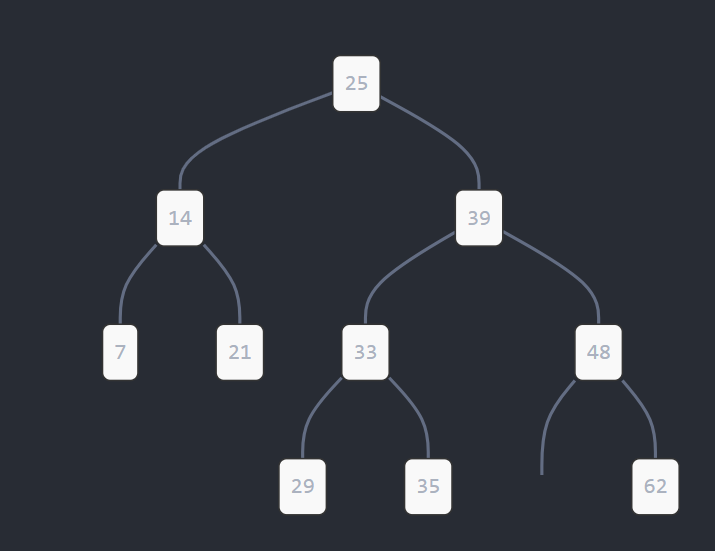

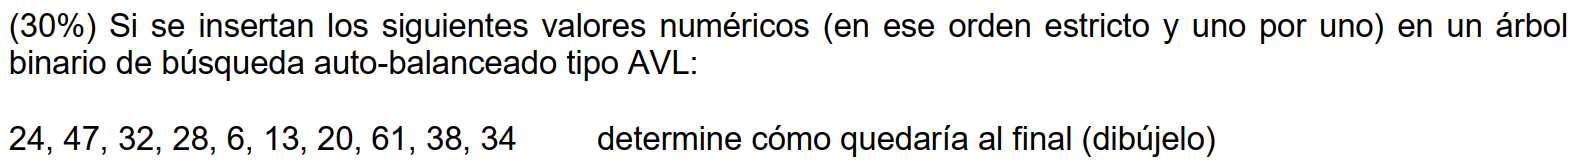

In [7]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def get_height(self, node):
        return node.height if node else 0
    
    def get_balance(self, node):
        return self.get_height(node.left) - self.get_height(node.right) if node else 0
    
    def rotate_right(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        
        root.height = max(self.get_height(root.left), self.get_height(root.right)) + 1
        balance = self.get_balance(root)
        
        if balance > 1 and key < root.left.key:
            return self.rotate_right(root)
        if balance < -1 and key > root.right.key:
            return self.rotate_left(root)
        if balance > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        
        return root
    
    def print_tree(self, root, level=0, prefix="Root: "):
        if root is not None:
            print(" " * (level * 4) + prefix + str(root.key))
            if root.left or root.right:
                self.print_tree(root.left, level + 1, "L--- ")
                self.print_tree(root.right, level + 1, "R--- ")

# Insertar los valores en orden dado
avl = AVLTree()
root = None
values = [24, 47, 32, 28, 6, 13, 20, 61, 38, 34]
for v in values:
    root = avl.insert(root, v)

# Mostrar el árbol AVL resultante
avl.print_tree(root)


Root: 24
    L--- 13
        L--- 6
        R--- 20
    R--- 38
        L--- 32
            L--- 28
            R--- 34
        R--- 47
            R--- 61


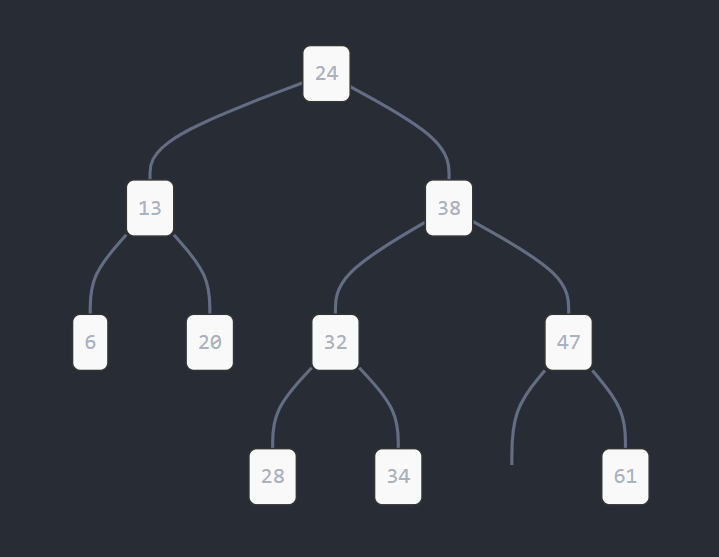

# Parcial 2023 2

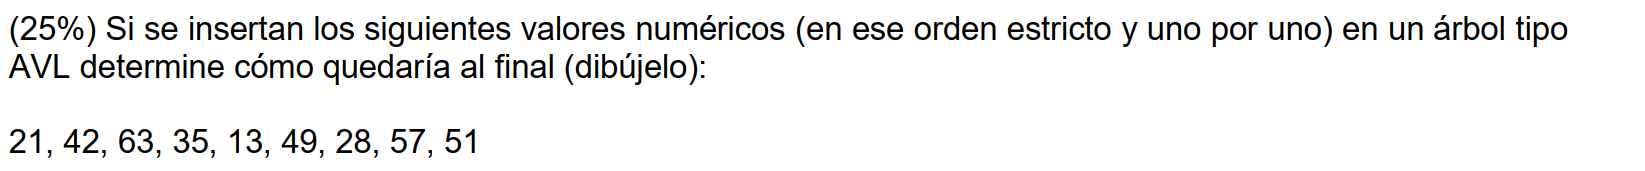

In [2]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def get_height(self, node):
        return node.height if node else 0
    
    def get_balance(self, node):
        return self.get_height(node.left) - self.get_height(node.right) if node else 0
    
    def rotate_right(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def rotate_left(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = max(self.get_height(z.left), self.get_height(z.right)) + 1
        y.height = max(self.get_height(y.left), self.get_height(y.right)) + 1
        return y
    
    def insert(self, root, key):
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)
        
        root.height = max(self.get_height(root.left), self.get_height(root.right)) + 1
        balance = self.get_balance(root)
        
        if balance > 1 and key < root.left.key:
            return self.rotate_right(root)
        if balance < -1 and key > root.right.key:
            return self.rotate_left(root)
        if balance > 1 and key > root.left.key:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)
        if balance < -1 and key < root.right.key:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)
        
        return root
    
    def print_tree(self, root, level=0, prefix="Root: "):
        if root is not None:
            print(" " * (level * 4) + prefix + str(root.key))
            if root.left or root.right:
                self.print_tree(root.left, level + 1, "L--- ")
                self.print_tree(root.right, level + 1, "R--- ")

# Insertar los valores en orden dado
avl = AVLTree()
root = None
values = [21, 42, 63, 35, 13, 49, 28, 57, 51]
for v in values:
    root = avl.insert(root, v)

# Mostrar el árbol AVL resultante
avl.print_tree(root)


Root: 42
    L--- 21
        L--- 13
        R--- 35
            L--- 28
    R--- 57
        L--- 49
            R--- 51
        R--- 63


In [ ]:
class NodoAVL:
    def __init__(self, valor):
        self.valor = valor
        self.izquierdo = None
        self.derecho = None
        self.altura = 1

class ArbolAVL:
    def __init__(self):
        self.raiz = None
    
    def altura(self, nodo):
        if not nodo:
            return 0
        return nodo.altura
    
    def factor_balance(self, nodo):
        if not nodo:
            return 0
        return self.altura(nodo.izquierdo) - self.altura(nodo.derecho)
    
    def actualizar_altura(self, nodo):
        if not nodo:
            return 0
        nodo.altura = 1 + max(self.altura(nodo.izquierdo), self.altura(nodo.derecho))
    
    def rotacion_derecha(self, y):
        x = y.izquierdo
        T2 = x.derecho
        
        # Realizar rotación
        x.derecho = y
        y.izquierdo = T2
        
        # Actualizar alturas
        self.actualizar_altura(y)
        self.actualizar_altura(x)
        
        return x
    
    def rotacion_izquierda(self, x):
        y = x.derecho
        T2 = y.izquierdo
        
        # Realizar rotación
        y.izquierdo = x
        x.derecho = T2
        
        # Actualizar alturas
        self.actualizar_altura(x)
        self.actualizar_altura(y)
        
        return y
    
    def insertar(self, raiz, valor):
        # Inserción normal en un BST
        if not raiz:
            return NodoAVL(valor)
        
        if valor < raiz.valor:
            raiz.izquierdo = self.insertar(raiz.izquierdo, valor)
        elif valor > raiz.valor:
            raiz.derecho = self.insertar(raiz.derecho, valor)
        else:
            # Los valores duplicados no se insertan
            return raiz
        
        # Actualizar altura del nodo actual
        self.actualizar_altura(raiz)
        
        # Obtener factor de balance
        balance = self.factor_balance(raiz)
        
        # Caso 1: Desbalance izquierda-izquierda
        if balance > 1 and valor < raiz.izquierdo.valor:
            return self.rotacion_derecha(raiz)
        
        # Caso 2: Desbalance derecha-derecha
        if balance < -1 and valor > raiz.derecho.valor:
            return self.rotacion_izquierda(raiz)
        
        # Caso 3: Desbalance izquierda-derecha
        if balance > 1 and valor > raiz.izquierdo.valor:
            raiz.izquierdo = self.rotacion_izquierda(raiz.izquierdo)
            return self.rotacion_derecha(raiz)
        
        # Caso 4: Desbalance derecha-izquierda
        if balance < -1 and valor < raiz.derecho.valor:
            raiz.derecho = self.rotacion_derecha(raiz.derecho)
            return self.rotacion_izquierda(raiz)
        
        return raiz
    
    def insertar_valor(self, valor):
        self.raiz = self.insertar(self.raiz, valor)
    
    def preorden(self, nodo):
        if not nodo:
            return
        print(nodo.valor, end=" ")
        self.preorden(nodo.izquierdo)
        self.preorden(nodo.derecho)
    
    def imprimir_arbol(self):
        print("Recorrido preorden:")
        self.preorden(self.raiz)
        print()

# Prueba con los valores del problema
def resolver_problema():
    # Crear un árbol AVL y realizar las inserciones
    avl = ArbolAVL()
    valores = [21, 42, 63, 35, 13, 49, 28, 57, 51]
    
    print("Inserción paso a paso:")
    for valor in valores:
        avl.insertar_valor(valor)
        print(f"Después de insertar {valor}:", end=" ")
        avl.imprimir_arbol()
    
    return avl

# Ejecutar la solución
if __name__ == "__main__":
    resolver_problema()

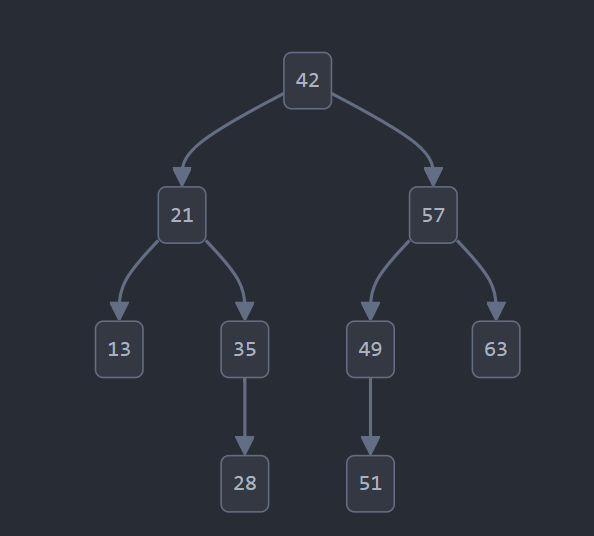

Para nuestro árbol, el recorrido en preorden sería:
42, 21, 13, 35, 28, 57, 49, 51, 63

Para nuestro árbol, el recorrido en posorden sería:
13, 28, 35, 21, 51, 49, 63, 57, 42

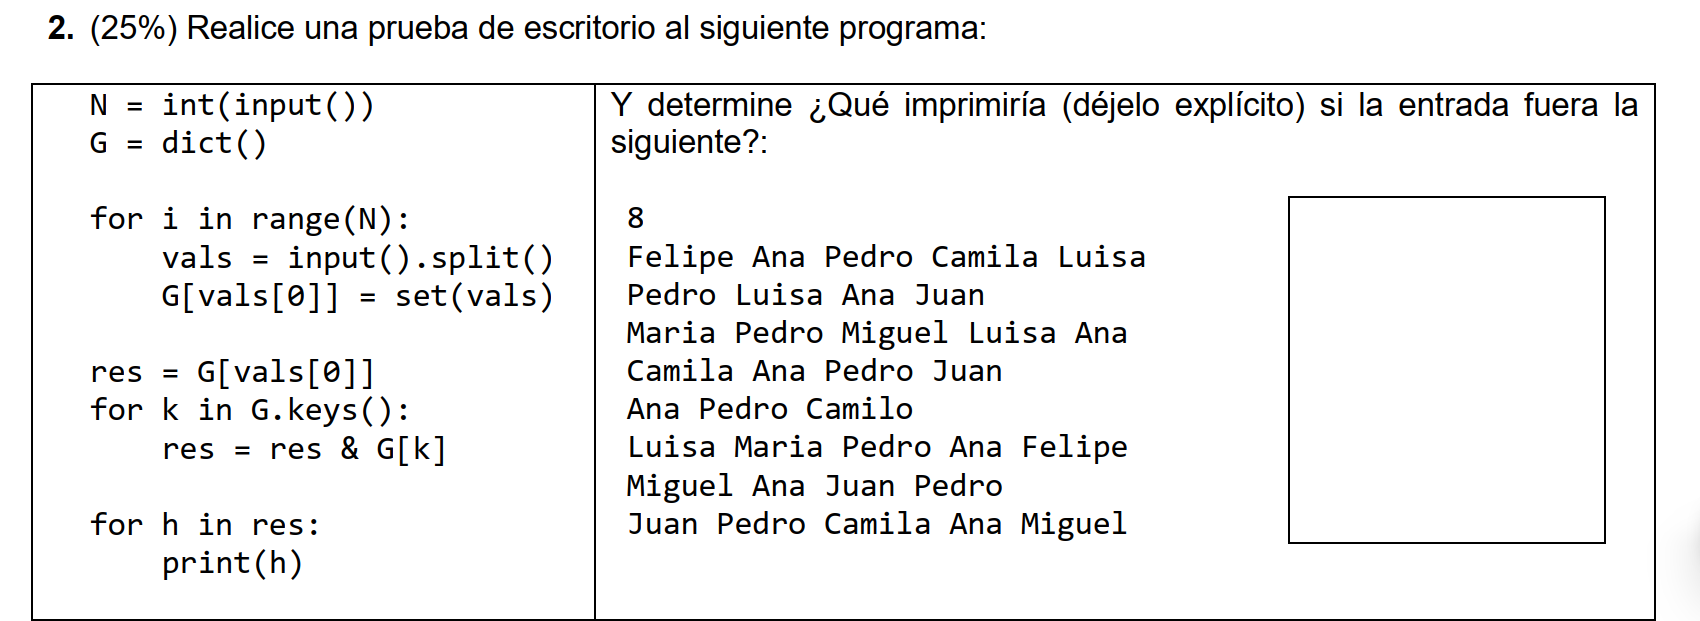

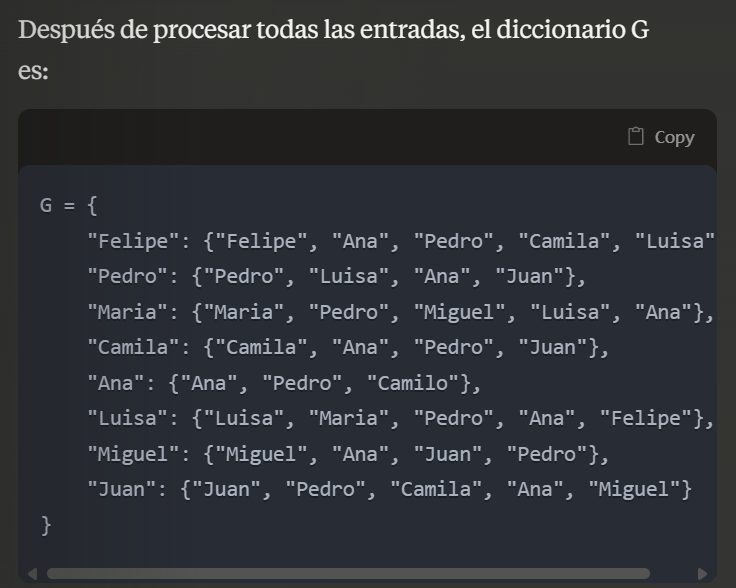
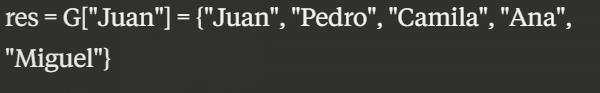

Luego se van haciendo las intersecciones entre los conjuntos quedando al final solo Ana y Pedro

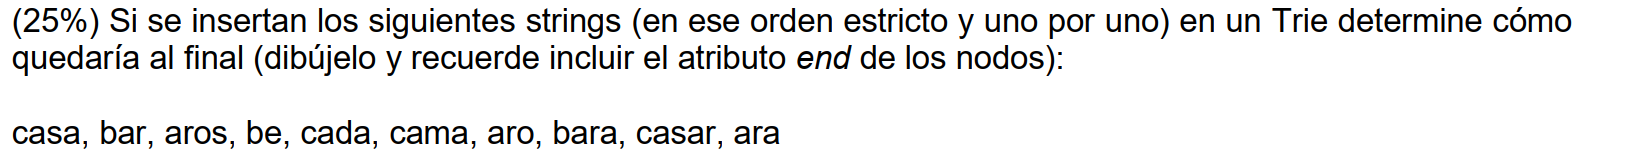

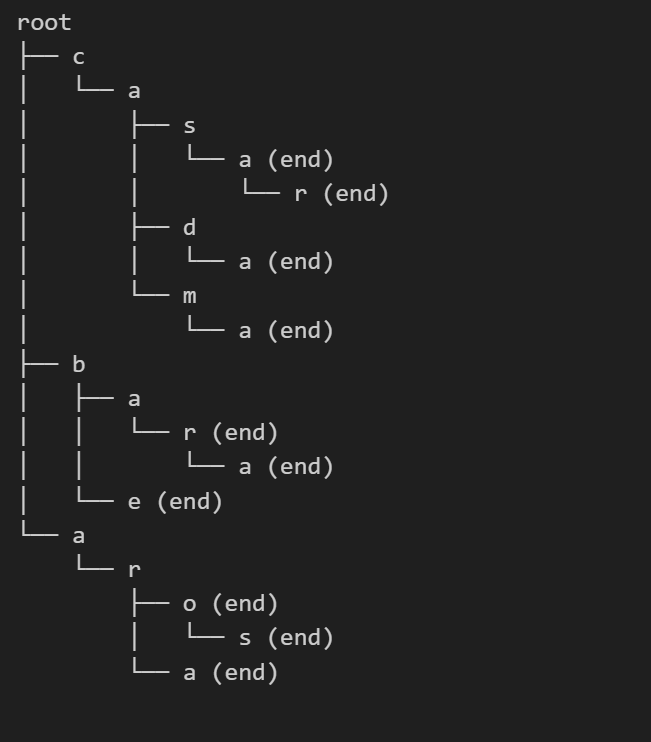

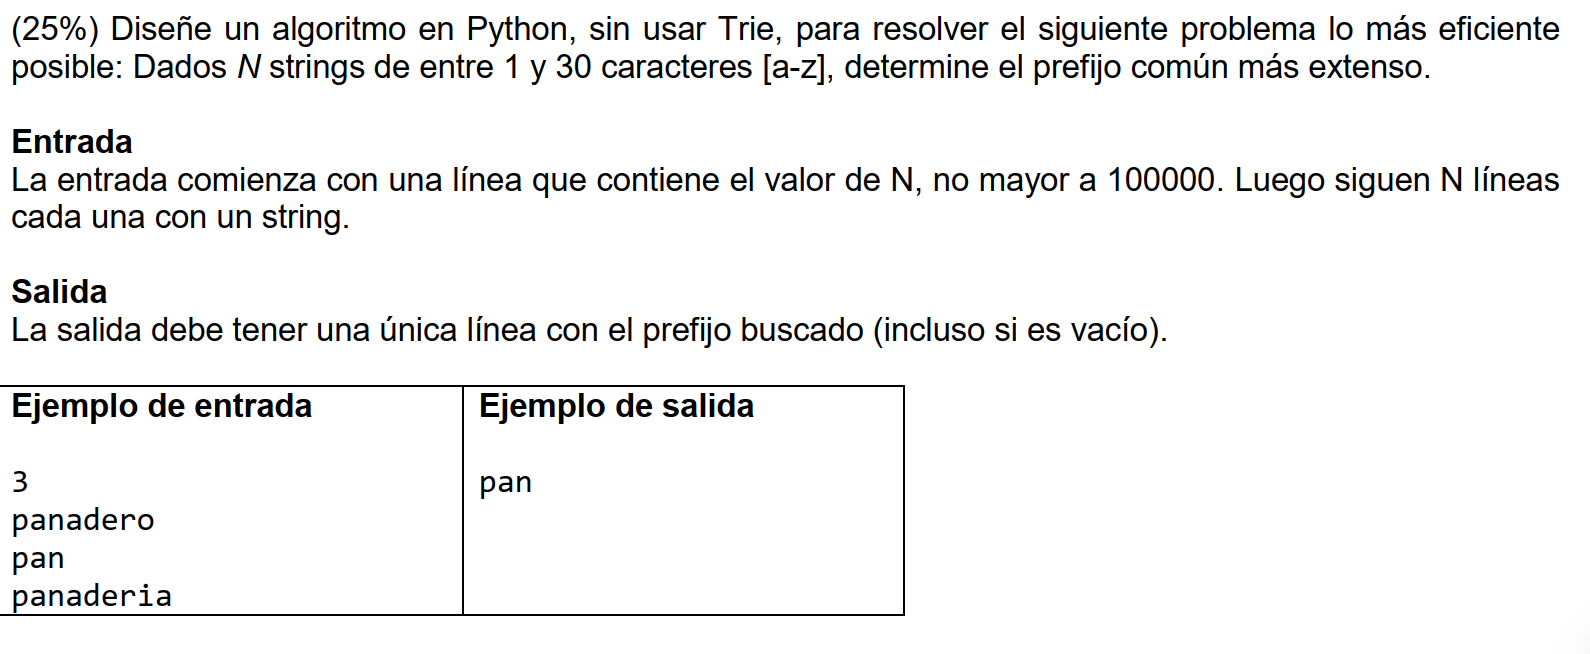

In [ ]:
def longest_common_prefix(strings):
    if not strings:
        return ""
    
    min_len = min(len(s) for s in strings)
    prefix = []
    
    for i in range(min_len):
        # Usar un conjunto para caracteres en la posición i
        chars = {s[i] for s in strings}
        if len(chars) != 1:
            break
        prefix.append(chars.pop())
    
    return ''.join(prefix)

# Leer entrada
n = int(input())
strings = [input().strip() for _ in range(n)]

# Calcular y mostrar el resultado
print(longest_common_prefix(strings))

In [ ]:
def longest_common_prefix(strings):
    if not strings:
        return ""
    
    prefix = strings[0]  # Tomamos la primera palabra como referencia

    for word in strings[1:]:
        i = 0
        while i < len(prefix) and i < len(word) and prefix[i] == word[i]:
            i += 1
        prefix = prefix[:i]  # Reducimos el prefijo común

        if not prefix:  # Si se vuelve vacío, terminamos
            break

    return prefix

# Leer entrada
n = int(input())
strings = [input() for _ in range(n)]

# Calcular y mostrar el resultado
print(longest_common_prefix(strings))


{'o', 'r', 'd', 'e', 'p', 'n', 'a'}


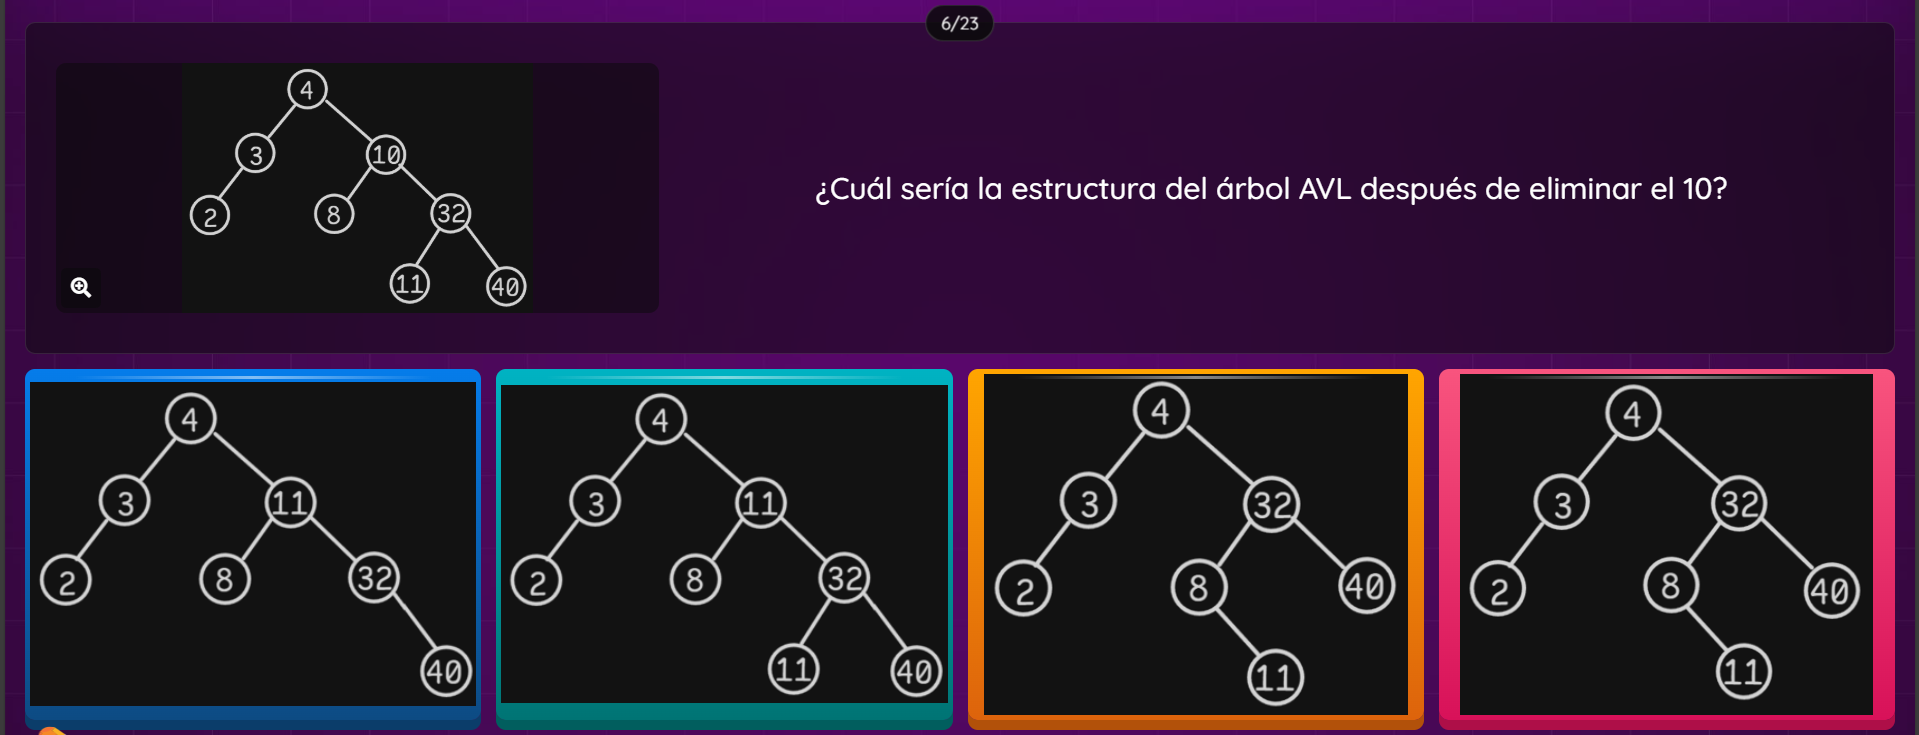

El proceso de eliminación en árboles AVL es igual al de los árboles binarios de búsqueda salvo que una vez eliminado el elemento se debe tener en cuenta si esta eliminación produjo un desbalanceo y hacer el balanceo si es correspondiente

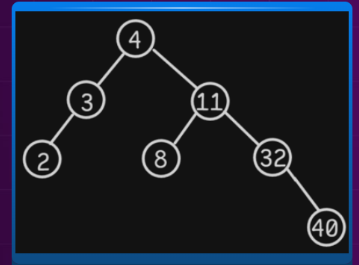

Solucion  usando el menor de los mayores


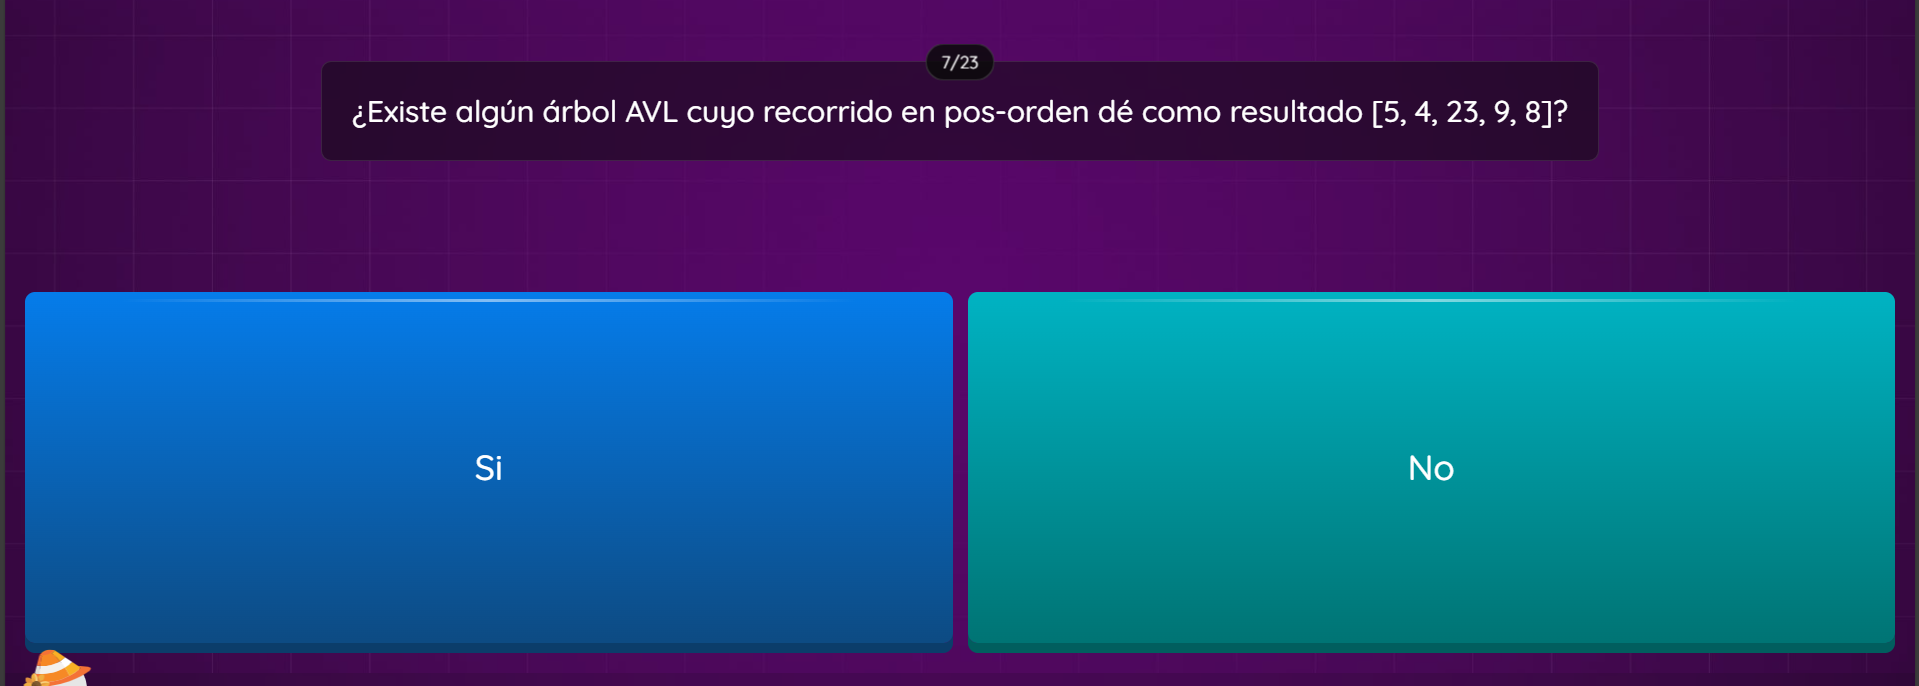

      8
     / \
    4   9
    \    \
     5   23

**A tener en cuenta:**  
✔ **Si tienes solo un recorrido (preorden, inorden o posorden), puede haber múltiples árboles con el mismo recorrido.**  
✔ **Si tienes dos recorridos (como preorden + inorden o posorden + inorden), puedes reconstruir un árbol único.** 🔥

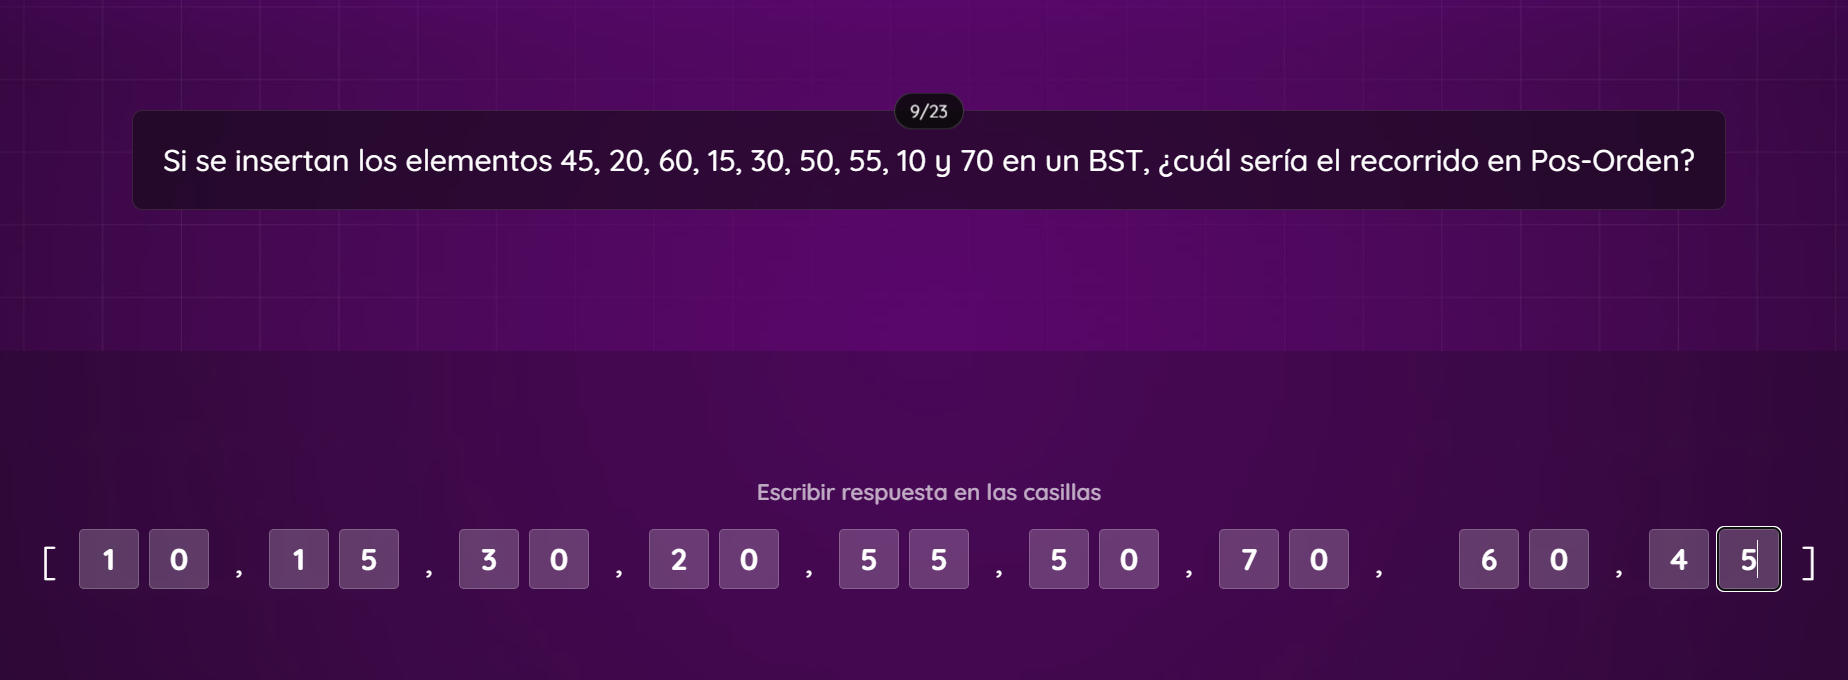

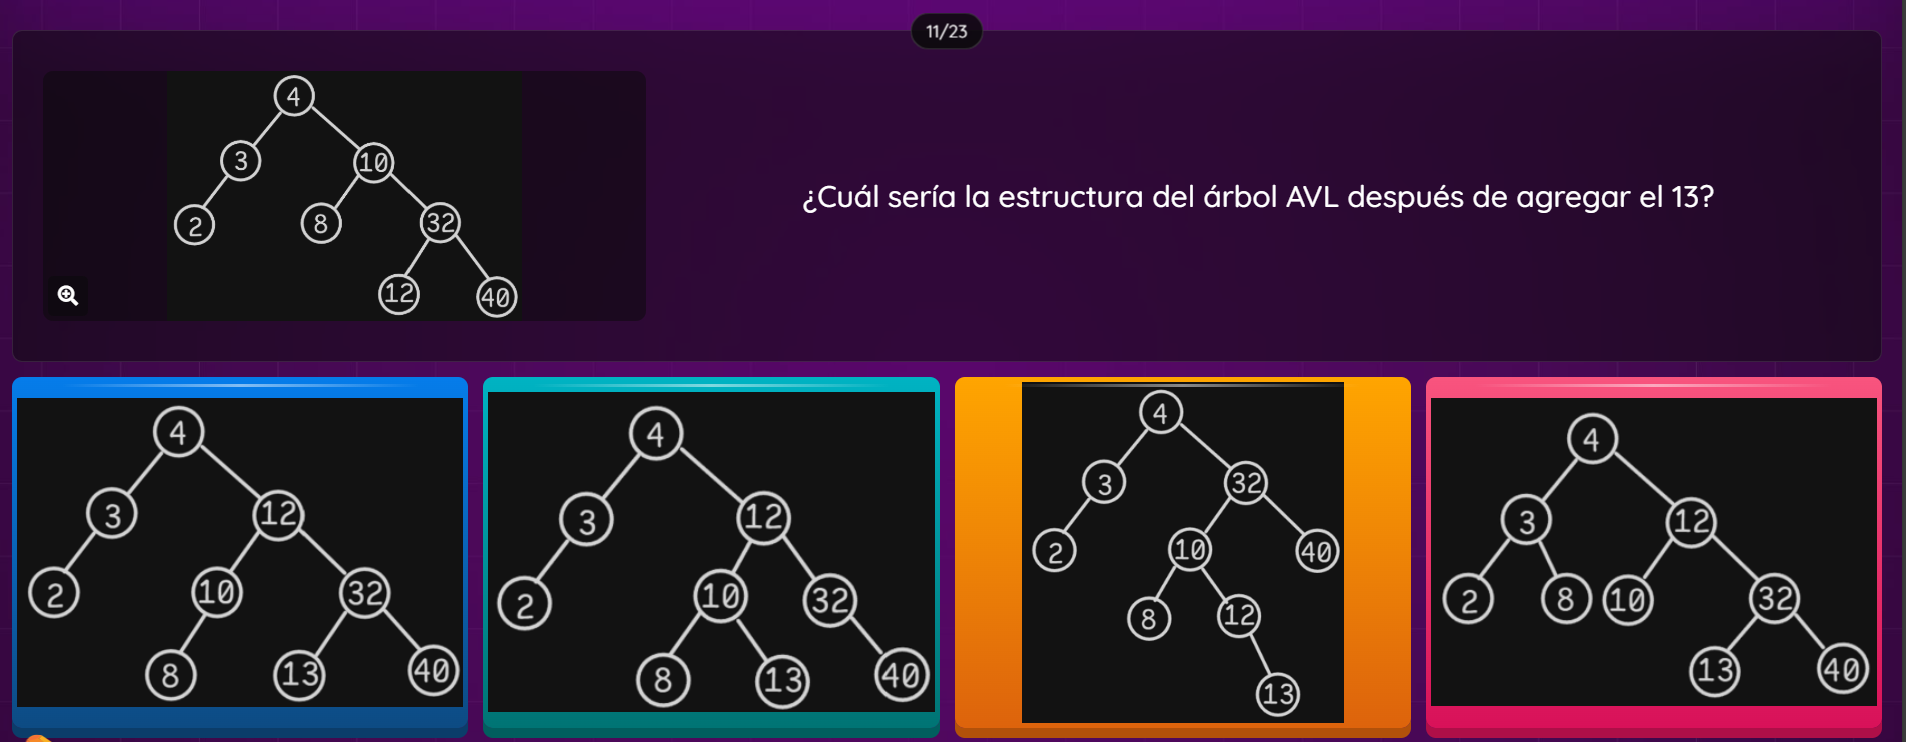

solucion

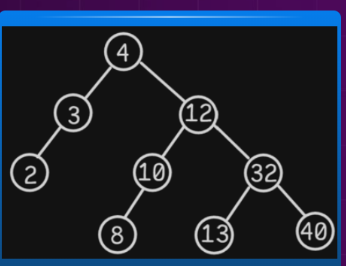

In [4]:
n = int(input())
cA = set()
cB = set()
for i in range(1, n):
    for j in range(1, n, i):
        
        if (i % 2):
            cA.add(j * 10)
        else:
            cB.add(j * 10)

print(cA | cB)


{70, 40, 10, 80, 50, 20, 90, 60, 30}
